# Plot Skeleton Tests

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

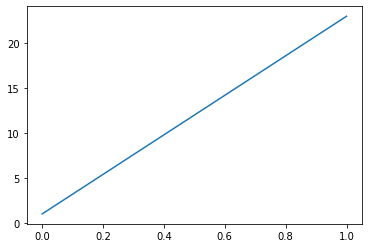

In [105]:
plt.plot((0,1),(1,23))
plt.show()

In [106]:
pose_df = pd.read_csv('resources/pose_dfs/demo_vid3_pose_df.csv', index_col=0)

In [107]:
v = pose_df.applymap(eval).loc[10]

In [108]:
v

nose              (0.19632474, 0.43062532, 0.57348716)
left_eye          (0.18174373, 0.44592234, 0.76520467)
right_eye          (0.18525474, 0.41752076, 0.5170977)
left_ear           (0.20505825, 0.46723956, 0.6909349)
right_ear         (0.20494673, 0.39773673, 0.58651036)
left_shoulder       (0.27675617, 0.5161878, 0.5469415)
right_shoulder       (0.272102, 0.35640782, 0.7096067)
left_elbow        (0.29500467, 0.62941897, 0.61378044)
right_elbow       (0.29459327, 0.29931527, 0.59007204)
left_wrist           (0.310206, 0.5768233, 0.33682343)
right_wrist       (0.32694972, 0.36909065, 0.40746602)
left_hip             (0.503144, 0.5014646, 0.88631195)
right_hip            (0.505942, 0.40280962, 0.8677472)
left_knee           (0.7023124, 0.52840364, 0.8316731)
right_knee         (0.65588486, 0.36993843, 0.6734023)
left_ankle         (0.83228743, 0.5367148, 0.82444656)
right_ankle         (0.7112407, 0.3935594, 0.47274423)
Name: 10, dtype: object

In [100]:
def plot_bone(v, bone):
    plt.plot([x[1] for x in v.loc[bone]], [x[0] for x in v.loc[bone]], linewidth=2, color='b')

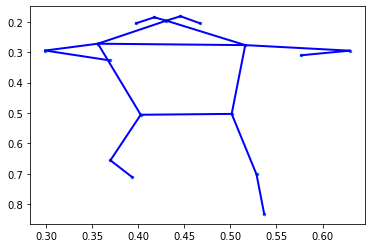

In [101]:
# plot nodes
plt.scatter([x[1] for x in v], [x[0] for x in v], s=6)

# plot bones
for bone in [
    ['nose', 'left_eye'],
    ['nose', 'right_eye'],
    ['left_eye', 'left_ear'],
    ['right_eye', 'right_ear'],
    ['nose', 'left_shoulder'],
    ['nose', 'right_shoulder'],
    ['left_shoulder', 'left_elbow'],
    ['left_elbow', 'left_wrist'],
    ['right_shoulder', 'right_elbow'],
    ['right_elbow', 'right_wrist'],
    ['left_shoulder', 'right_shoulder'],
    ['left_shoulder', 'left_hip'],
    ['right_shoulder', 'right_hip'],
    ['left_hip', 'right_hip'],
    ['left_hip', 'left_knee'],
    ['left_knee', 'left_ankle'],
    ['right_hip', 'right_knee'],
    ['right_knee', 'right_ankle']
    ]:
    plot_bone(v, bone)

plt.gca().invert_yaxis()


# Add Background Test

In [130]:
import sys
import pandas as pd
import numpy as np

from pose_estimator import pose_estimation, skeleton_creator, consts
from video_processing import video_processor as vp
from outliers_handling import outliers_detector
from cloud_storage import cloud_manager
import moviepy.editor as mp

In [118]:
# load resources for testing; will get from server
video_path = 'resources/videos/demo_vid3.mp4'
bg_img = None

# metadata extraction - width, height, fps, video length
metadata = vp.get_metadata_for_video(video_path)

# set black image as background if no background is given
if bg_img is None:
    bg_img = np.zeros((metadata['width'], metadata['height']))

# load data from cache in cloud
pose_df = cloud_manager.load_pose_df(video_path)

if pose_df is None:
    # video to images
    images_list = vp.video_to_images(video_path, save_to_disk=False)
    
    # pose estimation
    pose_df = pose_estimation.detect_pose(images_list)

    # TODO: Save results to cloud storage
    results_cache_success = cloud_manager.save_pose_df(pose_df, video_path)

# when loading from csv, need to eval tuples
try:
    pose_df = pose_df.applymap(eval)
except:
    pass

# detect anomalies
anomaly_inds = outliers_detector.detect_outliers(pose_df)

# fix anomalies
fixed_pose_df = outliers_detector.fix_outliers(pose_df, anomaly_inds)

In [132]:
def plot_bone(xs, ys, bone):
    plt.plot(xs.loc[bone], ys.loc[bone], linewidth=2, color='b')


def plot_skeleton(xs, ys):
    # plot nodes
    plt.scatter(xs, ys, s=6)

    # plot bones
    for bone in consts.BONES:
        plot_bone(xs, ys, list(bone))

    plt.gca().invert_yaxis()

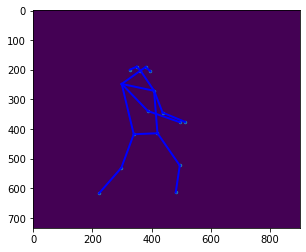

In [136]:
final_images_list = []
# load background_image

# change ratios of the skeleton to fit image shape

v = fixed_pose_df.iloc[0]
xs, ys, scores = v.apply(lambda x: x[1]), v.apply(lambda x: x[0]), v.apply(lambda x: x[2])

# scale
xs *= bg_img.shape[1]
ys *= bg_img.shape[0]

# TODO: filter high scores only

# "plot" image
plt.imshow(bg_img)

# add skeleton
plot_skeleton(xs, ys)

# TODO: add emoji head

# add final image to list of final images
plt.gca().invert_yaxis()

In [ ]:
pose_df = pd.read_csv('resources/pose_dfs/demo_vid3_pose_df.csv', index_col=0)

In [ ]:
v = pose_df.applymap(eval).loc[10]
# metadata extraction - width, height, fps, video length
metadata = vp.get_metadata_for_video(video_path)

# set black image as background if no background is given
if bg_img is None:
    bg_img = np.zeros((metadata['width'], metadata['height']))

In [ ]:
generate_images(pose_df, 'sticklight', np)

nose              (0.19632474, 0.43062532, 0.57348716)
left_eye          (0.18174373, 0.44592234, 0.76520467)
right_eye          (0.18525474, 0.41752076, 0.5170977)
left_ear           (0.20505825, 0.46723956, 0.6909349)
right_ear         (0.20494673, 0.39773673, 0.58651036)
left_shoulder       (0.27675617, 0.5161878, 0.5469415)
right_shoulder       (0.272102, 0.35640782, 0.7096067)
left_elbow        (0.29500467, 0.62941897, 0.61378044)
right_elbow       (0.29459327, 0.29931527, 0.59007204)
left_wrist           (0.310206, 0.5768233, 0.33682343)
right_wrist       (0.32694972, 0.36909065, 0.40746602)
left_hip             (0.503144, 0.5014646, 0.88631195)
right_hip            (0.505942, 0.40280962, 0.8677472)
left_knee           (0.7023124, 0.52840364, 0.8316731)
right_knee         (0.65588486, 0.36993843, 0.6734023)
left_ankle         (0.83228743, 0.5367148, 0.82444656)
right_ankle         (0.7112407, 0.3935594, 0.47274423)
Name: 10, dtype: object

In [5]:
def tuple_mean(tuple_of_tuples):
    return tuple(sum([t[i] for t in tuple_of_tuples])/len(tuple_of_tuples) for i in range(len(tuple_of_tuples[0])))

In [8]:
tuple_mean(((1,2,3), (1,3,5),    (1,2,4)))

(1.0, 2.3333333333333335, 4.0)